# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

Import necessary libraries; read in the data to a dataframe 'gcredit'

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [3]:
# Your code here! :)
gcredit = pd.read_csv('C:/Users/Admin/mec-mini-projects/mec-13.5.1-tree-based-algorithms-mini-project/GermanCredit.csv.zip')
gcredit.head()
# class is our label y value in this case
# check for null values
gcredit.isnull().any()==True


Duration                                  False
Amount                                    False
InstallmentRatePercentage                 False
ResidenceDuration                         False
Age                                       False
                                          ...  
Housing.ForFree                           False
Job.UnemployedUnskilled                   False
Job.UnskilledResident                     False
Job.SkilledEmployee                       False
Job.Management.SelfEmp.HighlyQualified    False
Length: 62, dtype: bool

gcredit has some values in 'class' that are categorical (good/bad). Change to 1 and 0 for ease of processing later on

In [4]:
# change class from good/bad to 1 and 0 for tree later
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(gcredit.Class)
binary_target = label_encoder.transform(gcredit.Class)
# print(binary_target)

Separate the data into test and training; train the decision tree and show the results!

In [54]:
# separate the data 
gcredit_df = gcredit.drop(columns='Class')
target = gcredit.loc[:,'Class']

# let's see how the target looks
print(target.value_counts())

# split training data 70-30
X_train, X_test, y_train, y_test = train_test_split(gcredit_df, binary_target, test_size=.3, random_state=17)

clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# print results without tuning or cross val
print(classification_report(y_test, y_pred))

print('Accuracy of untuned model: ', accuracy_score(y_test, y_pred))

Good    700
Bad     300
Name: Class, dtype: int64
              precision    recall  f1-score   support

           0       0.44      0.45      0.44        92
           1       0.75      0.75      0.75       208

    accuracy                           0.66       300
   macro avg       0.60      0.60      0.60       300
weighted avg       0.66      0.66      0.66       300

Accuracy of untuned model:  0.6566666666666666


Tune hyperparameters; we found the best criterion at a depth of 10, using gini

In [6]:
# hyperparam tuning
parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,4,6,8,10,12]
}

clf_GS = GridSearchCV(clf, parameters, cv=5)
clf_GS.fit(X_train, y_train)
print('Best Criterion:', clf_GS.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['max_depth'])
#print(clf_GS.best_estimator_.get_params())
#print(clf_GS.best_params_)
print('Accuracy of tuned model: ', clf_GS.best_score_)

# best criterion is shown to be gini, with a max depth of 10

Best Criterion: gini
Best max_depth: 10
Accuracy of tuned model:  0.7228571428571429


We can then recreate the decision tree using the parameters we found. Test on the test data!

In [7]:
# recreate a decision tree using the best values from hyperparameter tuning
bestclf = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=10)
bestclf = bestclf.fit(X_train, y_train)
predicted = bestclf.predict(X_test)

print(classification_report(y_test, predicted))

print('Accuracy of tuned model: ', accuracy_score(y_test, predicted))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50        92
           1       0.78      0.78      0.78       208

    accuracy                           0.69       300
   macro avg       0.64      0.64      0.64       300
weighted avg       0.69      0.69      0.69       300

Accuracy of tuned model:  0.6933333333333334


### Our final Decision Tree returned an accuracy of 0.69, compared to the original accuracy of 0.656 on the untrained model, tested using the test data!

### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [8]:
# ! pip install dtreeviz

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

In [11]:
# Your code here! :)
import dtreeviz
import warnings

warnings.filterwarnings('ignore')

viz = dtreeviz.model(bestclf, X_train, y_train, target_name='Class',
                     feature_names=gcredit_df.columns
              )
v = viz.view()
v.save('C:/Users/Admin/mec-mini-projects/mec-13.5.1-tree-based-algorithms-mini-project/german.svg')

### Visualize the decision tree!

In [12]:
v

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [13]:
from sklearn.ensemble import RandomForestClassifier

### We will repeat the previous steps that were taken on the Decision tree, but this time on a Random Forest:  
   <br> 1. Train and test on same split of data; print results
   <br> 2. Tune hyperparameters and find ideal values (this time with bootstrap, max_depth, n_estimators)
   <br> 3. Recreate Random Forest with new parameters and test on test data!

In [56]:
# Your code here! :)
forest = RandomForestClassifier(random_state=0)
forest = forest.fit(X_train, y_train)
y_forest = forest.predict(X_test)

# print results without tuning or cross val
print(classification_report(y_test, y_forest))

print('Accuracy of untuned model: ', accuracy_score(y_test, y_forest))

              precision    recall  f1-score   support

           0       0.63      0.37      0.47        92
           1       0.76      0.90      0.83       208

    accuracy                           0.74       300
   macro avg       0.70      0.64      0.65       300
weighted avg       0.72      0.74      0.72       300

Accuracy of untuned model:  0.74


In [17]:
# hyperparam tuning
parameters = {
     'bootstrap': [True, False],
     'max_depth': [20, 30, 40, 50],
     'n_estimators': [200, 300, 400]
}

forest_GS = GridSearchCV(forest, parameters, cv=5)
forest_GS.fit(X_train, y_train)

print(forest_GS.best_params_)
print('Accuracy of tuned model: ', forest_GS.best_score_)


{'bootstrap': False, 'max_depth': 30, 'n_estimators': 300}
Accuracy of tuned model:  0.7842857142857144


In [18]:
# create final model with parameters
bestforest = RandomForestClassifier(bootstrap=False, max_depth=30, n_estimators=300)
bestforest = bestforest.fit(X_train, y_train)
forest_pred = bestforest.predict(X_test)

print(classification_report(y_test, forest_pred))

print('Accuracy of tuned model: ', accuracy_score(y_test, forest_pred))

              precision    recall  f1-score   support

           0       0.59      0.38      0.46        92
           1       0.76      0.88      0.82       208

    accuracy                           0.73       300
   macro avg       0.68      0.63      0.64       300
weighted avg       0.71      0.73      0.71       300

Accuracy of tuned model:  0.73


### Our final tuned Random Forest returned an accuracy of 0.73, compared to the untuned accuracy of 0.74.

As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

### Visualize the feature importances of each of our features in the Random Forest. There are over 60 features! 
We can see here that the most impactful features are:
<br> Duration, Amount, and Age

In [20]:
# Your code here
# find importances first
import time
import numpy as np

start_time = time.time()
importances = bestforest.feature_importances_
std = np.std([tree.feature_importances_ for tree in bestforest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.022 seconds


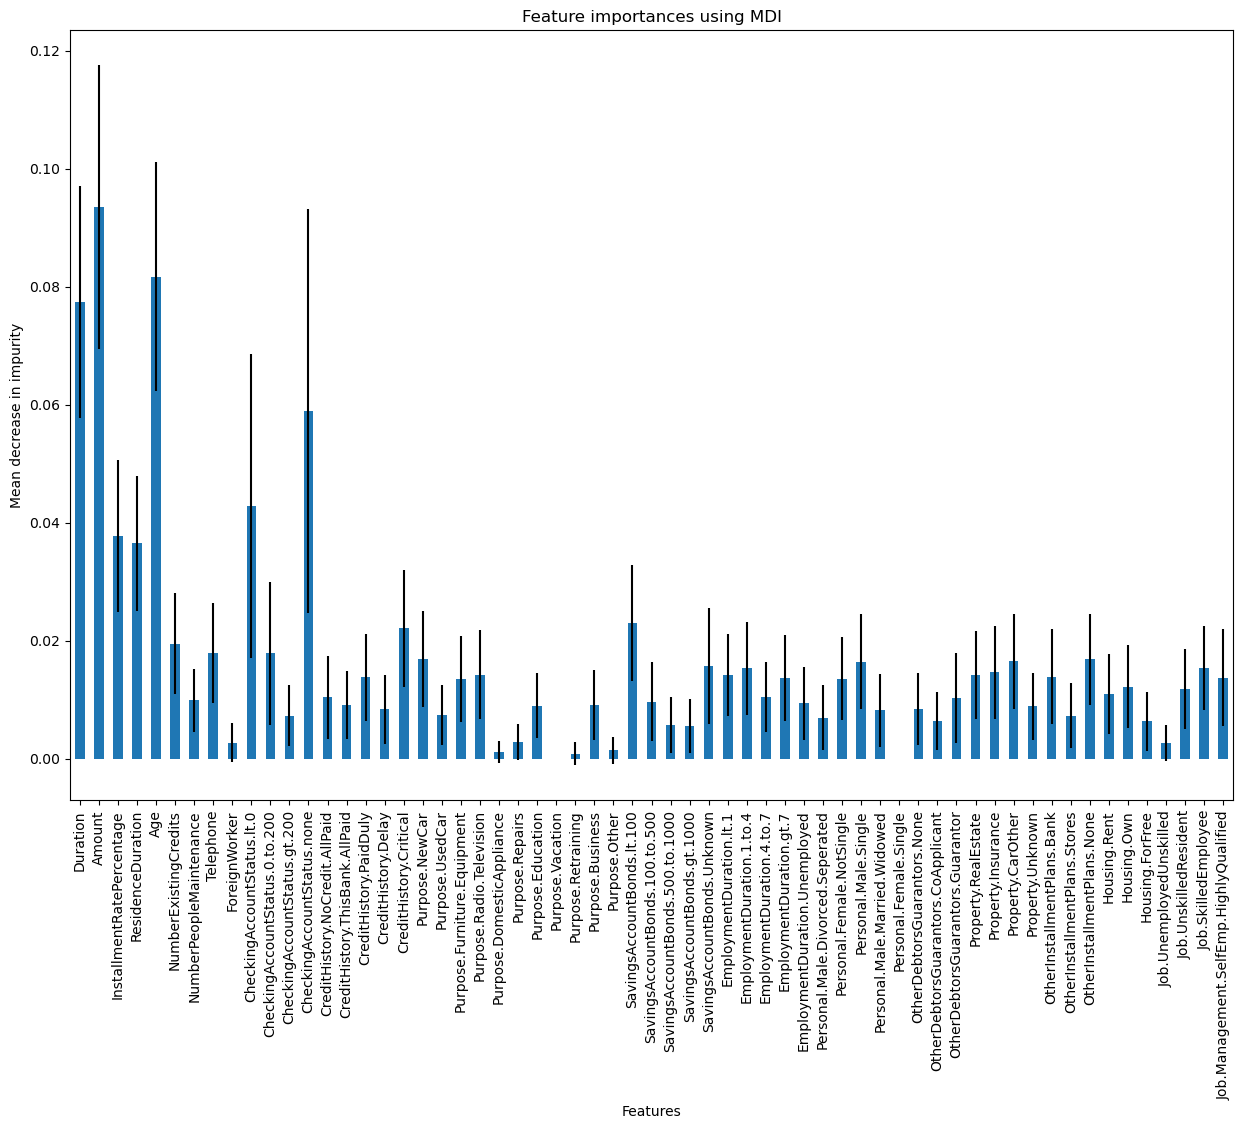

In [21]:
# visualize
import matplotlib.pyplot as plt
forest_importance = pd.Series(importances, index=gcredit_df.columns)

fig, ax = plt.subplots()
forest_importance.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.set_xlabel("Features")
fig.set_figwidth(15)
fig.set_figheight(10)


A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [22]:
# ! pip install pdpbox

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

### Plot partial dependence plots of the most impactful features:
In this case, I chose to use 'Duration' and 'Amount' to see the PDPs.
<br> PDP using pdpbox:

(<Figure size 1050x1250 with 5 Axes>,
 {'title_ax': <Axes: >,
  'pdp_inter_ax': {'_pdp_x_ax': <Axes: xlabel='Duration'>,
   '_pdp_y_ax': <Axes: ylabel='Amount'>,
   '_pdp_inter_ax': <Axes: >}})

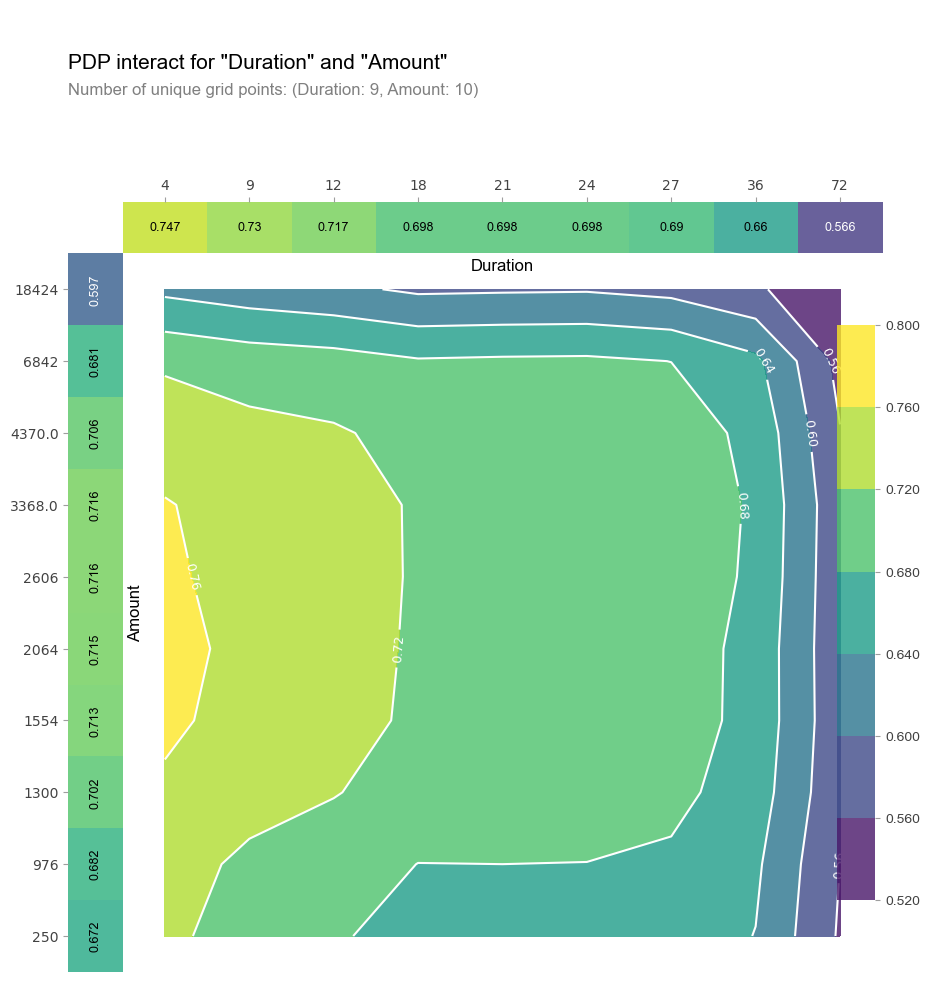

In [112]:
# Your code here!
# source: https://github.com/briangriner/notebooks/blob/master/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.ipynb

from joblib import dump, load

# save model to disk
filename = 'C:/Users/Admin/mec-mini-projects/mec-13.5.1-tree-based-algorithms-mini-project/model.sav'
#pickle.
dump(bestforest, filename)

# load model from disk
rf = load(filename)
#pickle.load(filename)

# partial plots of 'Duration' and 'Amount' (first 2 features from previous plot)
import pdpbox
from pdpbox import pdp
pdp_dur_amt = pdp.pdp_interact(rf,dataset=gcredit,model_features=gcredit_df.columns,features=['Duration','Amount'])
pdp.pdp_interact_plot(pdp_dur_amt, ['Duration','Amount'],  plot_type='contour', x_quantile=True, plot_pdp=True)

### Alternatively, we can also show the PDPs using PartialDependenceDisplay, which also shows the individual PDPs of each feature as a line graph!

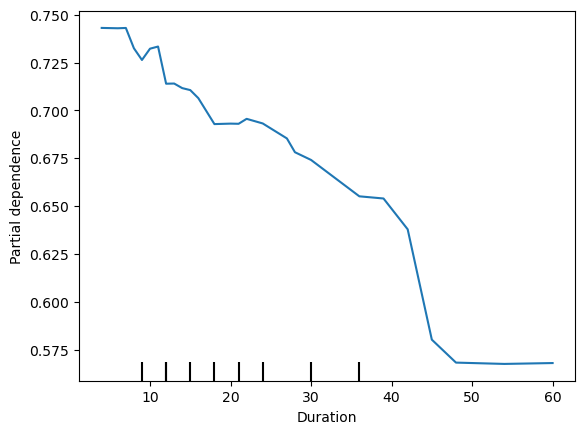

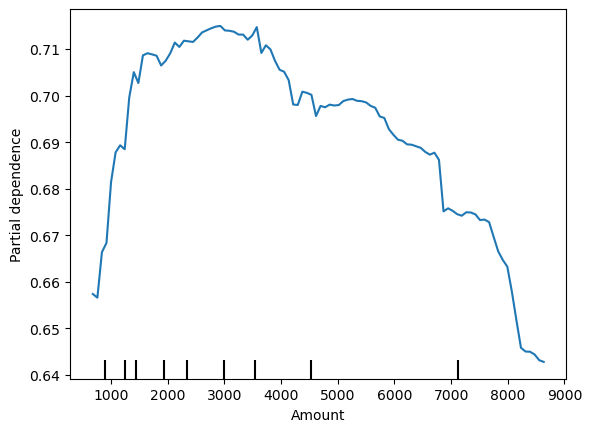

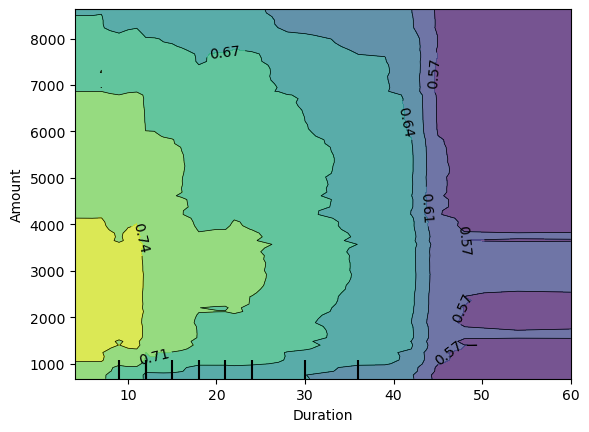

In [121]:
# alternatively, with independent partial dependence plots

from sklearn.inspection import PartialDependenceDisplay
features = [(0, 1)] 
PartialDependenceDisplay.from_estimator(bestforest, X_test, ['Duration'])
PartialDependenceDisplay.from_estimator(bestforest, X_test, ['Amount'])
PartialDependenceDisplay.from_estimator(bestforest, X_test, features)

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [24]:
# ! conda install -c anaconda py-xgboost

### We'll start by training a dataset using xgboost. 
We already have the data prepared, so we just need to put it into a DMatrix to be used by XGBoost.

In [45]:
import xgboost as xgb
# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

params = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
evallist = [(dtrain_reg, 'train'), (dtest_reg, 'eval')]


# initialize model
n = 100
xgb_model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evallist,
   early_stopping_rounds=10
)


[0]	train-logloss:0.53176	eval-logloss:0.58373
[1]	train-logloss:0.49916	eval-logloss:0.57242
[2]	train-logloss:0.47026	eval-logloss:0.56119
[3]	train-logloss:0.45218	eval-logloss:0.54568
[4]	train-logloss:0.43726	eval-logloss:0.55049
[5]	train-logloss:0.42494	eval-logloss:0.54424
[6]	train-logloss:0.41397	eval-logloss:0.54568
[7]	train-logloss:0.40433	eval-logloss:0.56191
[8]	train-logloss:0.39716	eval-logloss:0.56795
[9]	train-logloss:0.38932	eval-logloss:0.55952
[10]	train-logloss:0.37908	eval-logloss:0.56480
[11]	train-logloss:0.36999	eval-logloss:0.54206
[12]	train-logloss:0.36421	eval-logloss:0.55175
[13]	train-logloss:0.35663	eval-logloss:0.55920
[14]	train-logloss:0.34715	eval-logloss:0.55469
[15]	train-logloss:0.34115	eval-logloss:0.57356
[16]	train-logloss:0.33328	eval-logloss:0.57491
[17]	train-logloss:0.32927	eval-logloss:0.57320
[18]	train-logloss:0.32281	eval-logloss:0.57444
[19]	train-logloss:0.31906	eval-logloss:0.57271
[20]	train-logloss:0.31466	eval-logloss:0.56841


Early stopping rounds allows the boosting to stop when the model no longer shows significant improvement and picks the best one. We can then use this model and compare to test values!

In [61]:
xgb_model_pred = xgb_model.predict(dtest_reg, iteration_range=(0, xgb_model.best_iteration + 1))
#print(xgb_model_pred)

# Need to round values, as we're looking for binary results (good/bad)
xgb_model_round = [round(value) for value in xgb_model_pred]
#print(xgb_model_round)

print('Accuracy of boosted model: ', accuracy_score(y_test, xgb_model_round))

Accuracy of boosted model:  0.7166666666666667


### From the boosted model, we get an accuracy of 0.717 on the test data! Nice!

Note: hyperparameter tuning is available for XGBoost (example: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/), but for the sake of this example, I will try each of the three boosting algorithms without tuning first!

Additional Note: in this case, I didn't try using XGBoost with GPU enabled, as it was unavailable through conda. Boosting with GPU could result in better accuracy! More testing required.

### Next, we repeat the process with catboost

In [ ]:
#! conda install -c conda-forge catboost

We are analyzing binary data (good/bad), so we can use catboost's Classfier

In [74]:
from catboost import CatBoostClassifier

# initialize model
cb = CatBoostClassifier(iterations=10, learning_rate=1, depth=2)
cb.fit(X_train, y_train)
cb_pred = cb.predict(X_test)

print('Accuracy of boosted model: ', accuracy_score(y_test, cb_pred))

0:	learn: 0.5377904	total: 837us	remaining: 7.54ms
1:	learn: 0.5150665	total: 1.83ms	remaining: 7.31ms
2:	learn: 0.5012436	total: 2.52ms	remaining: 5.87ms
3:	learn: 0.4892974	total: 3.28ms	remaining: 4.92ms
4:	learn: 0.4729678	total: 3.97ms	remaining: 3.97ms
5:	learn: 0.4682350	total: 4.63ms	remaining: 3.09ms
6:	learn: 0.4548267	total: 5.46ms	remaining: 2.34ms
7:	learn: 0.4477773	total: 6.17ms	remaining: 1.54ms
8:	learn: 0.4388803	total: 6.89ms	remaining: 765us
9:	learn: 0.4253286	total: 7.58ms	remaining: 0us
Accuracy of boosted model:  0.73


### From the boosted model, we get an accuracy of 0.73 on the test data. Could we get better results by tuning more? Perhaps!

Note: parameter tuning can be beneficial in this case as well. I just chose a few arbitrary 'iteration' counts and chose the best of them for now! Tested values include: 2, 5, 10, 100

### Finally, we'll repeat the process for lightgbm.

In [ ]:
# ! conda install -c conda-forge lightgbm

In [81]:
import lightgbm as lgb

# initialize model
lgb_model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
lgb_model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)], verbose=20,eval_metric='logloss')
lgb_pred = lgb_model.predict(X_test)

print('Accuracy of boosted model: ', accuracy_score(y_test, lgb_pred))

[20]	training's binary_logloss: 0.354083	valid_0's binary_logloss: 0.536907
[40]	training's binary_logloss: 0.234603	valid_0's binary_logloss: 0.539799
[60]	training's binary_logloss: 0.15938	valid_0's binary_logloss: 0.565153
[80]	training's binary_logloss: 0.112605	valid_0's binary_logloss: 0.593111
[100]	training's binary_logloss: 0.0796644	valid_0's binary_logloss: 0.627215
Accuracy of boosted model:  0.7066666666666667


### From the boosted model, we get an accuracy of 0.707 on the test data. Again, this is without specific parameter tuning!

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

# Finally, present all of the accuracies across the models we've used so far:
### Decision Tree(tuned), Random Forest(tuned), XGBoost(untuned), catboost(untuned), lightgbm(untuned)

In [85]:
# create a dataframe containing all of the accuracy values across the different models!
data = [accuracy_score(y_test, predicted), accuracy_score(y_test, forest_pred), accuracy_score(y_test, xgb_model_round), accuracy_score(y_test, cb_pred), accuracy_score(y_test, lgb_pred)]
df = pd.DataFrame(data, index=['Decision Tree(tuned)', 'Random Forest(tuned)', 'XGBoost(untuned)', 'CatBoost(untuned)', 'LightGBM(untuned)'], columns=['Accuracy Score'])
df.head()

,Accuracy Score
Decision Tree(tuned),0.693333
Random Forest(tuned),0.730000
XGBoost(untuned),0.716667
CatBoost(untuned),0.730000
LightGBM(untuned),0.706667


Additionally, include a graphic for ease of view

<Axes: title={'center': 'Model Accuracy Scores'}, xlabel='Models', ylabel='Accuracy'>

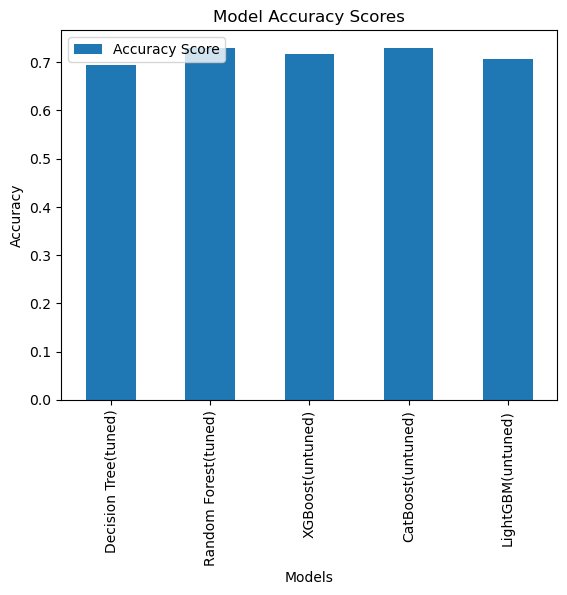

In [98]:
df.plot(kind='bar', title='Model Accuracy Scores', xlabel='Models', ylabel='Accuracy')

### The graph isn't that helpful, as all of the models have relatively similar accuracy scores. However, we can see that the tuned Random Forest and untuned CatBoost were still the best performers of the models we used in this mini-project!